In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
mask = (y==0) | (y==1)
X= X[mask]
y = y[mask]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
xg = xgb.XGBClassifier(n_estimators=10, max_depth = 5, learning_rate = 0.2, subsample = 0.8, eval_metric='error')
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
y_pred = xg.predict(X_test)

In [7]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



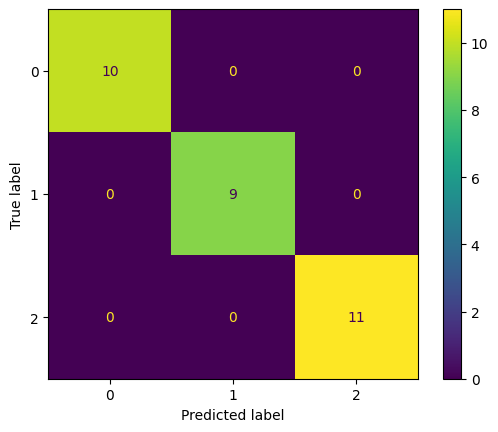

In [8]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [15]:
y_probs = xg.predict_proba(X_test)[:,1]

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [17]:
auc = roc_auc_score(y_test, y_probs)

In [18]:
print(f"AUC: {auc}")

AUC: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


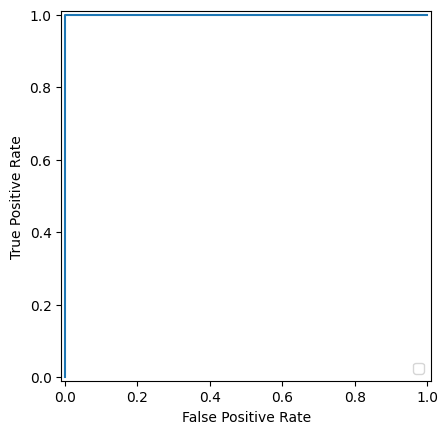

In [19]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.show()